In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

In [4]:
def standardized_residuals(residual, MSQE):
    return residual/np.sqrt(MSQE)

In [5]:
y_pred = np.array([2.2, 4.4, 6.6, 8.8])
y = np.array([2, 5, 6, 9])
residual = y - y_pred
MSQE = 0.4
res_padro = standardized_residuals(residual, MSQE)
res_padro

array([-0.31622777,  0.9486833 , -0.9486833 ,  0.31622777])

In [8]:
def check_standardized_residuals(residuos_standardized, ensaio, limite=2):
    aux = True
    for res_stand, ens in zip(residuos_standardized, ensaio):
        if np.abs(res_stand) > limite:
            aux = False
            print(f'O resíduo padronizado ({round(res_stand, 3)}) do ensaio "{ens}" esta acima do limite esperado ({limite})')
    if aux:
        print(f"Nenhum resíduo padronizado é maior do que {limite}.")

In [9]:
ensaio = ["A", "B", "C", "D"]
check_standardized_residuals(res_padro, ensaio, limite=2)

Nenhum resíduo padronizado é maior do que 2.


In [10]:
def make_standardized_residuals(standardized_residuals, y_pred, mild=2, extreme=3):
    
    # determinando o limite do eixo y
    y_min = np.abs(np.max([np.abs(standardized_residuals)]))
    if y_min < extreme:
        y_min = extreme*1.2
    else:
        y_min = y_min*1.2

    # criando o canvas
    plt.figure(figsize=(6,3))
    # adicionando os dados studentizados
    plt.scatter(y_pred, standardized_residuals, label="Resíduos Padronizados",  color='k', facecolor='none')

    # linhas em y = 0
    plt.axhline(y=0, color="gray", linestyle=(0, (2, 3)))

    # limite moderado
    plt.axhline(y=mild, color="orange", label="Limite moderado", linestyle="dotted")
    plt.axhline(y=-1*mild, color="orange", linestyle="dotted")
    
    # limite extremo
    plt.axhline(y=extreme, color="red", label="Limite extremo", linestyle="dashed")
    plt.axhline(y=-1*extreme, color="red", linestyle="dashed")

    # minor
    plt.ylabel("Resíduos Padronizados")
    plt.xlabel("Sinal predito")
    plt.ylim(-1*y_min, y_min)
    plt.legend(bbox_to_anchor=(1.01,1))
    plt.show()
    

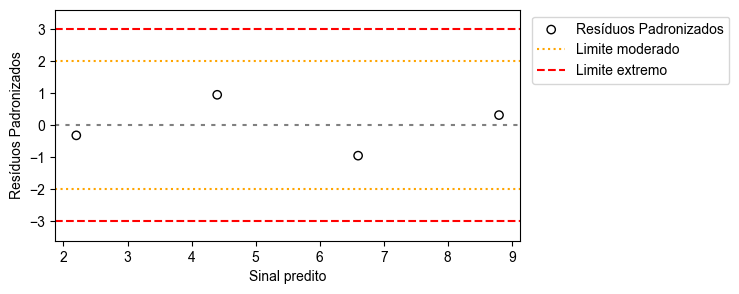

In [11]:
make_standardized_residuals(res_padro, y_pred,)